# Pytorch MNIST GAN (test)

In [2]:
#@title Load Dataset

import torch

print(torch.cuda.is_available()) #check Notebook settings

import torchvision.datasets as dsets
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

dataset=dsets.MNIST(root='/content/mnist', train=False, download=True, transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))


True


100%|██████████| 9912422/9912422 [00:00<00:00, 111261390.20it/s]


Extracting /content/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /content/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 116141604.82it/s]

Extracting /content/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mnist/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 39589056.15it/s]


Extracting /content/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20202045.35it/s]

Extracting /content/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mnist/MNIST/raw



Feature batch shape: torch.Size([64, 1, 64, 64])
Labels batch shape: torch.Size([64])


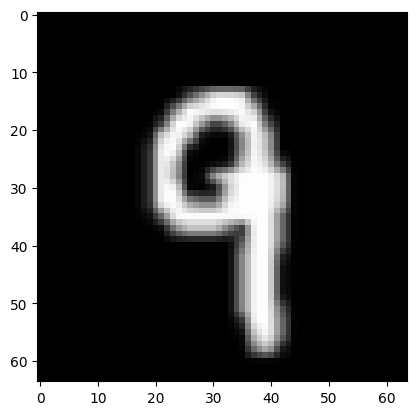

Label: 9


In [3]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [4]:
#@title Generator Model definition

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential = nn.Sequential(

          #1st layer (input) --> starting from a [1,100] noise, produce a (64,64,1) image
          nn.ConvTranspose2d(100, 64 * 8, 4, 1, 0, bias=False), # in, out, kernel size, stride, padding
          nn.BatchNorm2d(64 * 8),
          nn.ReLU(True),


          #2nd layer (1st hidden)
          nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
          nn.BatchNorm2d(64 * 4),
          nn.ReLU(True),

          #3rd layer (2nd hidden)
          nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
          nn.BatchNorm2d(64 * 2),
          nn.ReLU(True),

          #4th layer (3rd hidden)
          nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
          nn.BatchNorm2d(64),
          nn.ReLU(True),

          #5th layer (output)
          nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
          nn.Tanh()
        )



    def forward(self, x):
        return self.sequential(x)

In [5]:
class Discriminator(nn.Module):
  def __init__(self):
        super().__init__()
        self.sequential = nn.Sequential(
          # 1st
          nn.Conv2d(1, 64, 4, 2, 1, bias=False), # in, out, kernel size, stride, padding
          nn.LeakyReLU(0.2, inplace=True),

          # 2nd layer
          nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
          nn.BatchNorm2d(64 * 2),
          nn.LeakyReLU(0.2, inplace=True),

          # 3rd layer
          nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
          nn.BatchNorm2d(64 * 4),
          nn.LeakyReLU(0.2, inplace=True),

          # 4th layer
          nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
          nn.BatchNorm2d(64 * 8),
          nn.LeakyReLU(0.2, inplace=True),

          # output layer
          nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
          nn.Sigmoid()
        )

  def forward(self, x):
        return self.sequential(x).view(-1, 1).squeeze(1) #???

In [6]:
generator=Generator()
discriminator=Discriminator()

print(generator)
#print(discriminator)

Generator(
  (sequential): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()


In [7]:
#@title Loss function definition and optimizer
import torch.optim as optim

loss=nn.BCELoss() #Binary Cross-Entropy

optimizerG=optim.Adam(generator.parameters(), 1e-4)
optimizerD=optim.Adam(discriminator.parameters(), 1e-4)


##Training Loop (Da approfondire)

In [ ]:
print("Starting Training")

num_epochs=5
for epoch in range(num_epochs):
  for i, data in enumerate(dataloader,0):

    #Discriminator with real data interaction

    discriminator.zero_grad() #set grads to zero --> Pytorch accumulates gradients

    real=data[0]
    size=real.size(0)
    label=torch.full((size,),1, dtype=torch.float) #create a tensor with "1" (REAL_LABEL) values

    #passo il batch reale al discriminator
    output=discriminator(real).view(-1) #la view(-1) è una flatten sostanzialmente

    #compute loss
    discriminator_real_error=loss(output,label)

    discriminator_real_error.backward() #calculate gradient

    D_x=output.mean().item()

    #Discriminator with fake data interaction

    seed=torch.randn(size,100,1,1) #size: numero di campioni
                                   # 100: numero di elementi per campione
                                   # 1: single-channel (cmap ='gray')
                                   # 1: single-channel (cmap ='gray')

    fake_image=generator(seed)
    label.fill_(0) # fill_ doesn't create a new tensor, just replaces the older one, filling it with "0" (FAKE_LABEL) values

    output=discriminator(fake_image.detach()).view(-1) #sempre view xk devo fare la flatten in uscita
                                                       #detach da approfondire: in sostanza sembra che stacchi il tensore dal grafo computazionale,
                                                       #   e questo comporta una maggiore efficienza e prevenire il leakage del gradiente (???)
    discriminator_fake_error= loss(output,label)
    discriminator_fake_error.backward()

    D_G_z1=output.mean().item()

    total_error=discriminator_real_error+discriminator_fake_error #loss come somma delle due loss

    optimizerD.step() #update del discriminator

    #Generator (!) with fake data interaction

    generator.zero_grad()

    label.fill_(1) #real label

    output=discriminator(fake_image).view(-1)
    Generator_error=loss(output,label)


'''
    # Output training stats
    if i % 50 == 0:
        print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
              % (epoch, EPOCH_NUM, i, len(dataloader),
                  errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    # Save Losses for plotting later
    G_losses.append(errG.item())
    D_losses.append(errD.item())

    # Check how the generator is doing by saving G's output on fixed_noise
    if (iters % 500 == 0) or ((epoch == EPOCH_NUM-1) and (i == len(dataloader)-1)):
        with torch.no_grad():
            fake = netG(viz_noise).detach().cpu()
        img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

    iters += 1
'''

Starting Training


In [ ]:
#@title Plot Real images batch

real_batch=next(iter(dataloader)) #dataloader mi prende automaticamente il batch


plt.imshow(real_batch) #??? da testare


In [ ]:
#@title PROVA --> TODO: manca la specifica della label per ogni immagine

def visualize_batch(batch):
	# initialize a figure
	fig = plt.figure("testing plot",
		figsize=(64, 64))
	# loop over the batch size
	for i in range(0, 64):
		# create a subplot
		ax = plt.subplot(2, 4, i + 1)
		# grab the image, convert it from channels first ordering to
		# channels last ordering, and scale the raw pixel intensities
		# to the range [0, 255]
		image = batch[0][i].cpu().numpy()
		image = image.transpose((1, 2, 0))
		image = (image * 255.0).astype("uint8")

		# show the image
		plt.imshow(image)
		plt.axis("off")
	# show the plot
	plt.tight_layout()
	plt.show()


real_batch=next(iter(dataloader)) #dataloader mi prende automaticamente il batch
visualize_batch(real_batch)